In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Система ОДУ

$ x' = y $

$ y' = x^2 - 1 $

## Метод Рунге–Кутты (4-ого порядка)

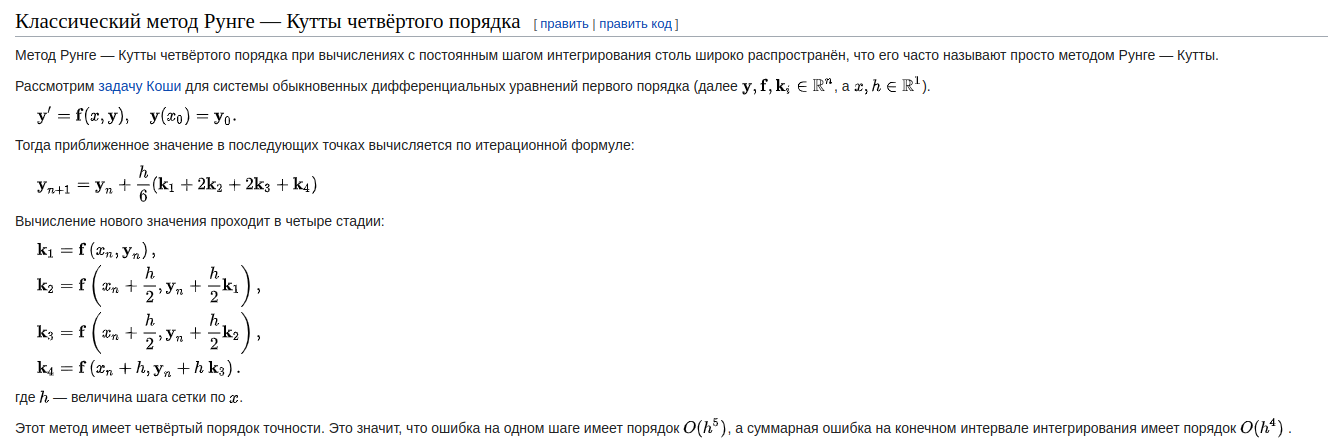

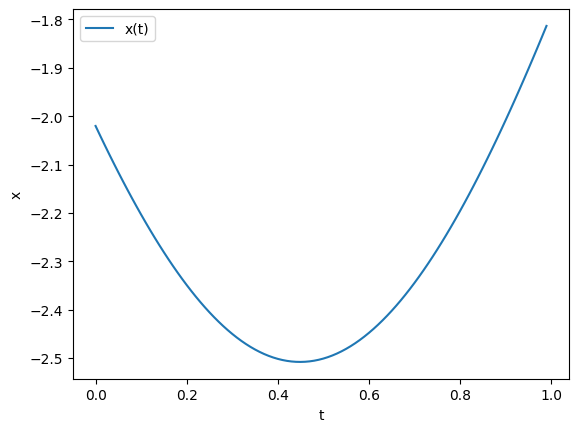

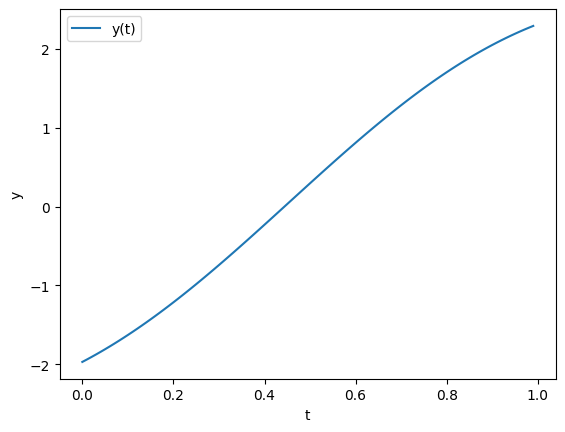

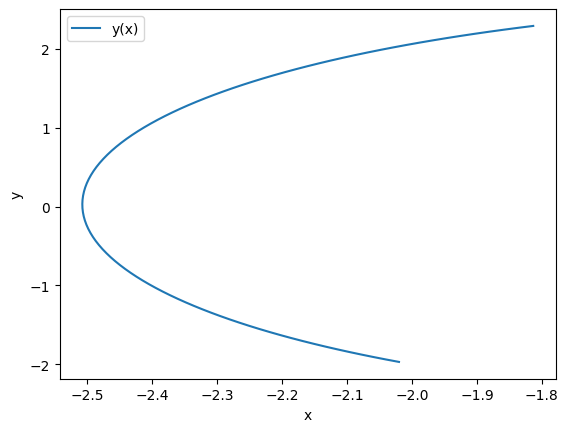

In [41]:
x = -2
y = -2

t = 0
t_end = 1
dt = 0.01

time = []
x_values = []
y_values = []

while t < t_end:
    k1_x = y
    k1_y = x*x - 1

    k2_x = y + (dt / 2) * k1_x
    k2_y = (x + dt/2)*(x + dt/2) - 1

    k3_x = y + (dt/2) * k2_x
    k3_y = (x + dt/2)*(x + dt/2) - 1

    k4_x = y + dt * k3_x
    k4_y = (x + dt)*(x + dt) - 1
    
    x += (dt/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    y += (dt/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    
    time.append(t)
    x_values.append(x)
    y_values.append(y)
    
    t += dt

plt.figure(1)
plt.plot(time, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.figure(2)
plt.plot(time, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.figure(3)
plt.plot(x_values, y_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## Метод Адамса-Бошфорта (2-ого порядка)

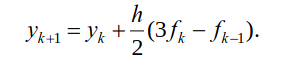

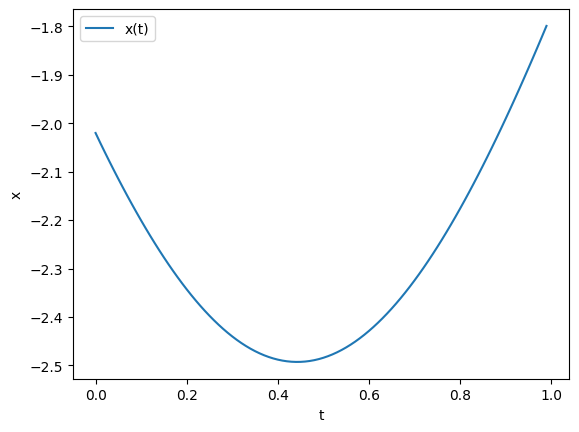

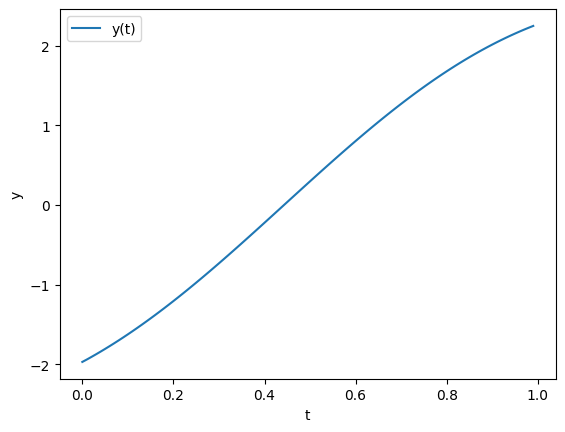

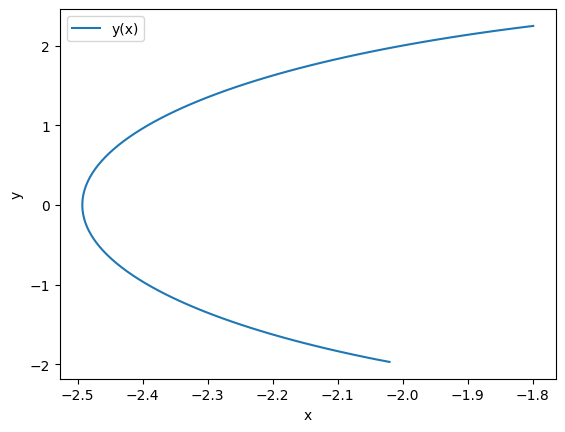

In [42]:
x = -2
y = -2

t = 0
t_end = 1
dt = 0.01

time = []
x_values = []
y_values = []

while t < 2 * dt:
    k1_x = y
    k1_y = x*x - 1

    k2_x = y + (dt / 2) * k1_x
    k2_y = (x + dt/2)*(x + dt/2) - 1

    k3_x = y + (dt/2) * k2_x
    k3_y = (x + dt/2)*(x + dt/2) - 1

    k4_x = y + dt * k3_x
    k4_y = (x + dt)*(x + dt) - 1
    
    x += (dt/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    y += (dt/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    
    time.append(t)
    x_values.append(x)
    y_values.append(y)
    
    t += dt

while t < t_end:
    x += (dt/2) * (3 * (y_values[-1]) - (y_values[-2]))
    y += (dt/2) * (3 * (x_values[-1]*x_values[-1] - 1) - (x_values[-2]*x_values[-2] - 1))

    time.append(t)
    x_values.append(x)
    y_values.append(y)
    
    t += dt

plt.figure(1)
plt.plot(time, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.figure(2)
plt.plot(time, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.figure(3)
plt.plot(x_values, y_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## ФДН (2-ого порядка)

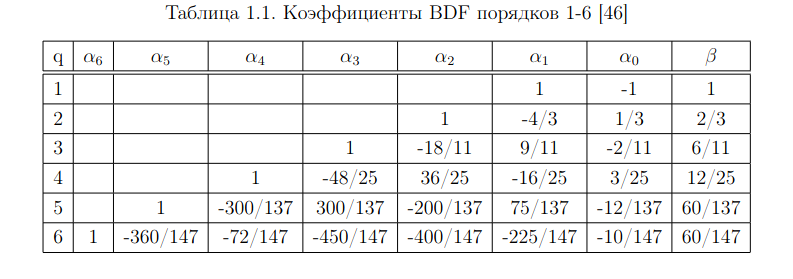

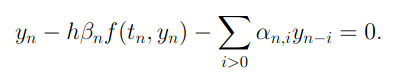

In [ ]:
def solve_nonlinear_system_equations_by_newton_method(F, u0, precision=1e-5):
    """
    F(u) = 0 -> u_{k+1} = u_{k} - J^{-1}(u_{k})*F(u_{k})
    :param F: equation that represented by numpy array
    :param u0: start value that represented by numpy array
    :param precision: precision that represented by float number
    :return: solution and residual that represented by 2 numpy arrays
    """
    n = u0.shape[0]

    def calculate_J(u):

        def derivative(i, j, h=1e-2):
            return (F[i](*(u + np.array([h if index == j else 0 for index in range(n)]))) - F[i](*u)) / h

        J = np.zeros(shape=(n, n))

        for i in range(n):
            for j in range(n):
                J[i, j] = derivative(i, j)

        return J

    residual = []

    current_u = u0
    next_u = current_u - np.matmul(np.linalg.inv(calculate_J(current_u)), np.array([F[i](*current_u) for i in range(n)]))

    residual.append(np.linalg.norm(next_u - current_u))

    n_iterations = 0
    max_n_iterations = 10000
    
    while residual[-1] > precision:
        current_u = next_u
        next_u = current_u - np.matmul(np.linalg.inv(calculate_J(current_u)), np.array([F[i](*current_u) for i in range(n)]))

        residual.append(np.linalg.norm(next_u - current_u))

        n_iterations += 1

        # if n_iterations == max_n_iterations:
        #     print('break')
        #     break
    
    return next_u, np.array(residual)

In [50]:
x = -2
y = -2

t = 0
t_end = 1
dt = 0.01

time = []
x_values = []
y_values = []

while t < 3 * dt:
    k1_x = y
    k1_y = x*x - 1

    k2_x = y + (dt / 2) * k1_x
    k2_y = (x + dt/2)*(x + dt/2) - 1

    k3_x = y + (dt/2) * k2_x
    k3_y = (x + dt/2)*(x + dt/2) - 1

    k4_x = y + dt * k3_x
    k4_y = (x + dt)*(x + dt) - 1
    
    x += (dt/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    y += (dt/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    
    time.append(t)
    x_values.append(x)
    y_values.append(y)
    
    t += dt

n_iterations = 0

# print(x_values)
# print(y_values)

while t < t_end:
    
    solution, residual = solve_nonlinear_system_equations_by_newton_method(
        np.array(
            [
                lambda x, y: x - dt * (2/3)*y - (9/11)*x_values[-1] - (-18/11)*x_values[-2] - (1)*x_values[-3],
                lambda x, y: y - dt * (2/3)*(x*x - 1) - (9/11)*y_values[-1] - (-18/11)*y_values[-2] - (1)*y_values[-3]
            ]
        ),
        np.array([x, y]),
        1e-3
    )

    # print('x - ' + str(dt * (2/3)) + '*y + ' + str(- (-4/3)*x_values[-1] - (1)*x_values[-2]))
    # print('y - ' + str(dt * (2/3)) + '*(x*x - 1) + ' + str(- (-4/3)*y_values[-1] - (1)*y_values[-2]))
    # print(solution)
    
    n_iterations += 1
    # print(n_iterations)
    
    x = solution[0]
    y = solution[1]
    
    time.append(t)
    x_values.append(x)
    y_values.append(y)
    
    t += dt

plt.figure(1)
plt.plot(time, x_values, label='x(t)')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.figure(2)
plt.plot(time, y_values, label='y(t)')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

plt.figure(3)
plt.plot(x_values, y_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

KeyboardInterrupt: 